# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Read data 
from keras.datasets import mnist  
(trainData_2D, trainLabels), (testData_2D, testLabels) = mnist.load_data() 


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape
print('Data Dimensionality: ')
print(trainData_2D.shape)

# print first 5 rows in your dataset
print('Head of Data: ')

#We need to reshape first // this is for training data
train_sz = trainData_2D.shape
trainData = np.reshape(trainData_2D,(train_sz[0],train_sz[1]*train_sz[2])).astype('float32')
#and this is for test data
test_sz = testData_2D.shape
testData = np.reshape(testData_2D,(test_sz[0],test_sz[1]*test_sz[2])).astype('float32')

# Now let us normalize it even if it is not necessary in this case to make computations faster
from sklearn.preprocessing import normalize
trainData = normalize(trainData)
testData = normalize(testData)

trainData = pd.DataFrame(trainData)#convert numpy to pandas
testData = pd.DataFrame(testData)

trainData.head(5)

Data Dimensionality: 
(60000, 28, 28)
Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.065585,0.112431,0.018739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

# i guess train_test_split automatically shuffles
# shuffle(trainData,random_state=20)

# Split 80-20
from sklearn.model_selection import train_test_split
(train_x, val_x, train_y, val_y) = train_test_split(trainData,trainLabels, test_size = 0.2, random_state = 12) # I splitted it %20 and %80





**Accuracy scores becomes higher when i dont use shuffle(trainData,random_state = 20) in part 4**

##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Train decision tree classifiers
min_samples_split = [2,5,10]

for samples in min_samples_split:
  clf_min_samples_split = DecisionTreeClassifier(min_samples_split = samples, random_state = 0)
  clf_min_samples_split.fit(train_x,train_y)
# Evaluate on validation set
  y_pred = clf_min_samples_split.predict(val_x)
  val_acc = accuracy_score(val_y, y_pred)
  print("Accuracy Score for validation",val_acc)
  train_y_pred = clf_min_samples_split.predict(train_x)
  train_acc = accuracy_score(train_y, train_y_pred)
  print("Accuracy Score for train",train_acc)
  # Plot errors
x_axis = ['model1', 'model2', 'model3']
plt.scatter(x_axis, val_acc)
plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation acc")
plt.plot(x_axis, train_acc, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuracy Score for validation 0.8720833333333333
Accuracy Score for train 1.0
Accuracy Score for validation 0.871
Accuracy Score for train 0.9826041666666666
Accuracy Score for validation 0.8695833333333334
Accuracy Score for train 0.9663541666666666


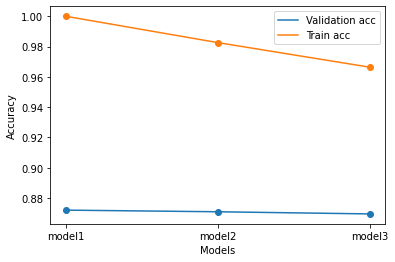

In [ ]:
x_axis = ['model1', 'model2', 'model3']
val_acc = [0.8720833333333333 ,0.871, 0.8695833333333334] # because i found the results above i just write it like this
train_acc = [1.0, 0.9826041666666666, 0.9663541666666666] # because i found the results above i just write it like this
plt.scatter(x_axis, val_acc)
plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation acc")
plt.plot(x_axis, train_acc, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Accuracy scores becomes lower if i use shuffle(trainData,random_state = 20) in part 4... so i did not because i think train_test_split automatically shuffles**

## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
# Load test data
clf = DecisionTreeClassifier(min_samples_split= 2,random_state= 0)
clf.fit(trainData,trainLabels)



# test prediction using a decision tree with all default parameters and ..... min-split value 
y_pred = clf.predict(testData)



# Report your accuracy
print("Accuracy Score", accuracy_score(testLabels,y_pred))



Accuracy Score 0.8813


##8) Notebook & Report 

**Notebook: We may just look at your notebook results; so make sure each cell is run and  outputs are there.**

**Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what dec. trees are or what MNIST is, assuming they are known to people in your research area). 

**Must include statements such as:**

 ( Include the problem definition: 1-2 lines )
 
  (Talk about train/val/test sets, size and how split. )
 
  (Talk about any preprocessing you do.)
  
 ( Give the validation accuracies for different approaches, parameters **in a table** and state which one you selected)
 
 ( State  what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier      (parameters=....) , giving classification accuracy of …% on test data….""

  (Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)).

*You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.*


Problem was to classify grayscale images using decision trees.
There were 784 rows in train dataset when we reduced the dimension from 2d to 1d.

What i did was, i created decision trees with different parameters. I downloaded dataset "mnist". I did some pre processing, like i reduced the dimension of data from 2d to 1 d and then i normalized the dataset so computations became faster and more accurate i believe. After that i splitted the data into two folds for validation and training. Using these datasets i trained decision trees with it. Then i calculated accuracy scores ( 1- error) and then i plotted it. Finally i created another model using the best parameters i found. In part 4, instrucions asked me to shuffle. I tried a function called shuffle but when i use that accuracy scores become abundantly lower like %10 so i searched a little and then i read couple of things about train_test_split. I believe that did the shuffling already. 

Accuracy Score for validation 0.8720833333333333
Accuracy Score for train 1.0
Accuracy Score for validation 0.871
Accuracy Score for train 0.9826041666666666
Accuracy Score for validation 0.8695833333333334
Accuracy Score for train 0.9663541666666666

Accuracy values can be seen from above i choose the first model because it gave 0.87 accuracy in validation data. I have obtained the best result (0.87) with min_samples_split with 2 parameters instead of 5 or 10.

##9) Submission

Please submit your **"share link" INLINE in Sucourse submissions**. That is we should be able to click on the link and go there and run (and possibly also modify) your code. 

For us to be able to modify, in case of errors etc, **you should get your "share link" as **share with anyone in edit mode** 

 **Also submit your notebook as pdf as attachment**, choose print and save as PDF, save with hw1-lastname-firstname.pdf to facilitate grading. 


## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
